Es un algoritmo no supervisado:

- *No necesita datos históricos*, ya que no vamos a predicir una variable


In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/afoone/caipc-laberit-jul2022/master/wine-clustering.csv')

In [6]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
data.shape

(178, 13)

In [10]:
import matplotlib.pyplot as plt


(array([ 1., 10., 19., 31., 21., 27., 25., 25., 17.,  2.]),
 array([11.03, 11.41, 11.79, 12.17, 12.55, 12.93, 13.31, 13.69, 14.07,
        14.45, 14.83]),
 <BarContainer object of 10 artists>)

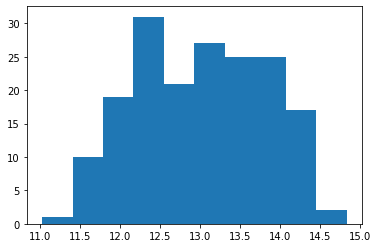

In [13]:
plt.hist(data['Alcohol'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [19]:
data.std()/data.mean()

Alcohol                 0.062445
Malic_Acid              0.478159
Ash                     0.115927
Ash_Alcanity            0.171304
Magnesium               0.143195
Total_Phenols           0.272689
Flavanoids              0.492226
Nonflavanoid_Phenols    0.343933
Proanthocyanins         0.359771
Color_Intensity         0.458332
Hue                     0.238730
OD280                   0.271851
Proline                 0.421623
dtype: float64

(array([18., 59., 33., 16., 14., 11., 14.,  7.,  3.,  3.]),
 array([0.74 , 1.246, 1.752, 2.258, 2.764, 3.27 , 3.776, 4.282, 4.788,
        5.294, 5.8  ]),
 <BarContainer object of 10 artists>)

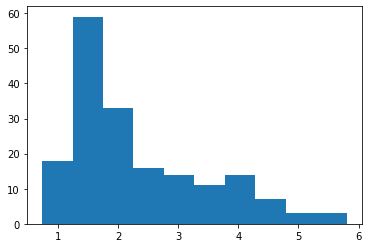

In [21]:
plt.hist(data['Malic_Acid'])

### Normalización lineal (0..1)

In [22]:
data['Alcohol']

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: Alcohol, Length: 178, dtype: float64

In [23]:
data['Alcohol'].min()

11.03

In [25]:
data['Alcohol'].max()

14.83

In [28]:
(data['Alcohol'] - data['Alcohol'].min()) / (data['Alcohol'].max() - data['Alcohol'].min())

0      0.842105
1      0.571053
2      0.560526
3      0.878947
4      0.581579
         ...   
173    0.705263
174    0.623684
175    0.589474
176    0.563158
177    0.815789
Name: Alcohol, Length: 178, dtype: float64

In [30]:
norm = (data-data.min())/(data.max()-data.min())

In [31]:
norm.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


# Clustering jerárquico




In [32]:
from sklearn.cluster import AgglomerativeClustering

In [37]:
cj = AgglomerativeClustering(n_clusters=10).fit(norm)

In [38]:
cj

AgglomerativeClustering(n_clusters=10)

In [39]:
cj.labels_

array([1, 1, 1, 9, 8, 9, 1, 1, 1, 1, 9, 1, 1, 9, 9, 1, 1, 1, 9, 1, 1, 1,
       1, 1, 1, 8, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 9, 9, 1, 9, 1, 1, 1, 1, 1, 9, 5, 5, 5, 2, 2, 3, 3,
       2, 2, 5, 7, 5, 8, 2, 8, 2, 5, 2, 5, 7, 6, 2, 2, 3, 4, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 7, 5, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2,
       6, 2, 3, 3, 2, 3, 2, 2, 4, 6, 2, 8, 6, 6, 6, 2, 2, 3, 2, 6, 0, 0,
       0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 0, 0, 0, 4,
       4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 0, 4, 0, 0, 0, 0, 4, 0, 0, 4, 4, 0,
       4, 4])

(array([19., 46., 31., 17., 31.,  8.,  7.,  3.,  5., 11.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

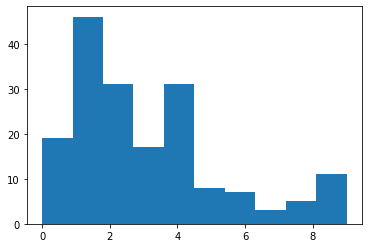

In [40]:
plt.hist(cj.labels_)

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

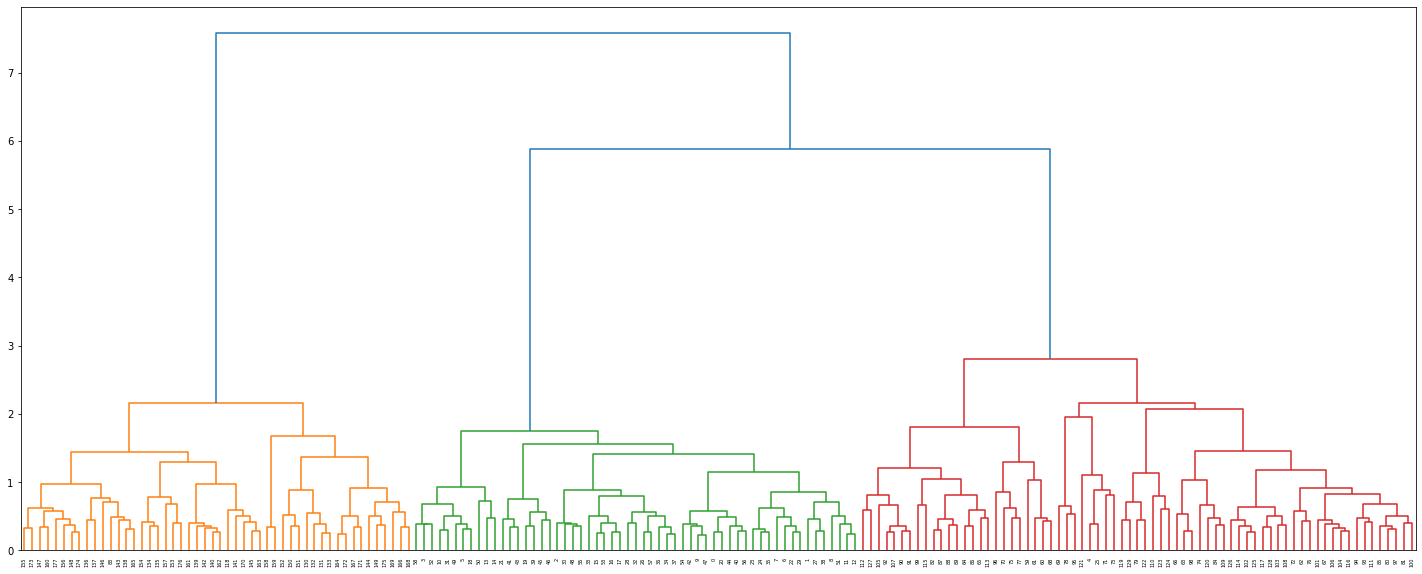

In [45]:
z = linkage(norm, 'ward')
plt.figure(figsize=(25,10))
dendrogram(z)
plt.show()

### k-means

In [46]:
from sklearn.cluster import KMeans

In [47]:
clus = KMeans(n_clusters = 6)

In [48]:
clus.fit(norm)

KMeans(n_clusters=6)

In [49]:
clus.labels_

array([3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 1, 1, 4, 1,
       1, 1, 4, 1, 4, 2, 1, 2, 2, 4, 1, 4, 1, 2, 1, 1, 1, 0, 1, 1, 4, 1,
       4, 1, 4, 4, 4, 1, 1, 2, 5, 1, 2, 2, 1, 1, 1, 1, 1, 4, 1, 4, 1, 2,
       2, 1, 4, 4, 1, 1, 1, 1, 4, 1, 2, 2, 2, 2, 2, 1, 1, 4, 1, 4, 5, 5,
       5, 5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 5, 5, 5, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [50]:
norm['cluster'] = clus.labels_

In [51]:
norm

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,3
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,3
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,3
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,3
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,0
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,0
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,0
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,0


In [53]:
# Centroides
clus.cluster_centers_

array([[0.57756233, 0.54217807, 0.57162961, 0.55642973, 0.28289474,
        0.24936479, 0.07495003, 0.69712016, 0.24290221, 0.52299263,
        0.17351305, 0.17678812, 0.25857797],
       [0.33609023, 0.16414455, 0.41298701, 0.46980854, 0.22981366,
        0.44935961, 0.37450271, 0.35525606, 0.38404687, 0.14648952,
        0.49477352, 0.62281528, 0.15072346],
       [0.37982456, 0.40711462, 0.60754605, 0.58075601, 0.3852657 ,
        0.64846743, 0.52648851, 0.35010482, 0.55853488, 0.17970231,
        0.43766938, 0.69088319, 0.24627516],
       [0.72645933, 0.23539346, 0.57413709, 0.31874414, 0.39071146,
        0.64695925, 0.56329114, 0.29262436, 0.47106395, 0.37078809,
        0.47657058, 0.69137529, 0.61628842],
       [0.31328321, 0.22576699, 0.49605297, 0.45729013, 0.24223602,
        0.28949097, 0.24050633, 0.67834681, 0.24605678, 0.16796685,
        0.44390244, 0.3525205 , 0.17753549],
       [0.47511962, 0.43568092, 0.60913952, 0.58528585, 0.47628458,
        0.1984326 , 0.17932

In [55]:
clus.inertia_ # Suma de cuadrados de las distancias de cada elemento hasta el centroide de su cluster

39.823131853349956

In [56]:
cl1 = KMeans(n_clusters = 1)
cl1.fit(norm)
cl1.inertia_

518.5714478970702

In [58]:
cl8 = KMeans(n_clusters = 8)
cl8.fit(norm)
cl8.inertia_

36.2364002888601

In [100]:
errors = list()

for i in range(1, 20):
    c = KMeans(n_clusters = i)
    c.fit(norm)
    errors.append(c.inertia_)
    
    
errors
    
    


[518.5714478970702,
 179.8693552558869,
 106.32551087995571,
 66.37971055841882,
 51.56141403162715,
 39.823131853349956,
 37.92762173885673,
 36.41583212703089,
 34.808028786178326,
 33.60713766678993,
 33.133629730955064,
 31.02720101950958,
 30.950705748132027,
 29.672421612948263,
 29.022733197050954,
 28.78084131664521,
 27.61872653163882,
 26.915391828553744,
 26.46548347963874]

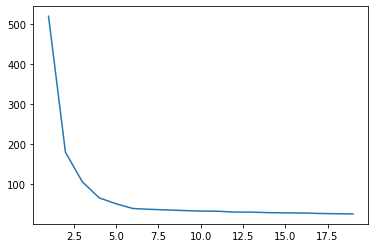

In [103]:
plt.plot(range(1,20), errors)

In [62]:
norm.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,0.056131
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,-0.267153
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,0.109321
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,-0.241862
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,0.275315
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,0.186185
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,0.371578
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,-0.346090
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,0.096885
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,-0.145563


In [86]:
c2 = KMeans(n_clusters = 6)
c2.fit(norm[['Alcohol','Malic_Acid']])
c2.inertia_

2.697947906633481

In [87]:
mi_cluster = norm[['Alcohol','Malic_Acid']].copy()

In [88]:
c_last = KMeans(n_clusters = 6)
c_last.fit(mi_cluster)
c_last.inertia_

2.7443340799992133

In [89]:
mi_cluster['cluster']= c_last.labels_

In [90]:
mi_cluster

,Alcohol,Malic_Acid,cluster
0,0.842105,0.191700,1
1,0.571053,0.205534,4
2,0.560526,0.320158,4
3,0.878947,0.239130,1
4,0.581579,0.365613,4
...,...,...,...
173,0.705263,0.970356,0
174,0.623684,0.626482,5
175,0.589474,0.699605,5
176,0.563158,0.365613,4


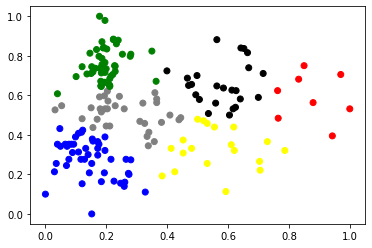

In [91]:
colors = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4: 'grey', 5: 'black'}

plt.scatter(mi_cluster['Malic_Acid'], mi_cluster['Alcohol'], c=mi_cluster['cluster'].map(colors))